In [1]:
import pandas as pd
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [3]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [4]:
from sklearn.model_selection import train_test_split 
X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_train = logreg.predict(X_train_scaled)
y_pred_test = logreg.predict(X_test_scaled)

In [7]:
y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [8]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
cm

array([[1111,   19],
       [  45,   75]])

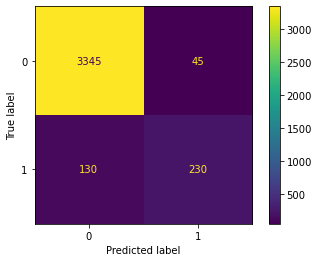

In [10]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(logreg, X_train_scaled, y_train)
plt.savefig('Train CM');

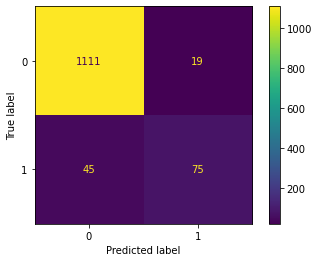

In [11]:
plot_confusion_matrix(logreg, X_test_scaled, y_test)
plt.savefig('Test CM');

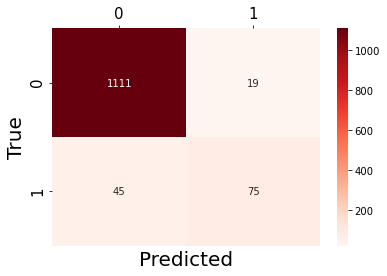

In [12]:
import seaborn as sns
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = '.0f', cmap='Reds'); #annot=True to annotate cells
# labels and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom') 
ax.xaxis.set_ticklabels([0, 1], fontsize = 15)
ax.xaxis.tick_top()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels([0, 1], fontsize = 15)
plt.savefig('Seaborn CM');

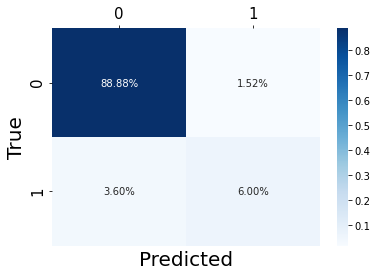

In [13]:
import numpy as np
ax= plt.subplot()
sns.heatmap(cm/np.sum(cm), annot=True, ax = ax, fmt='.2%', cmap='Blues')
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom') 
ax.xaxis.set_ticklabels([0, 1], fontsize = 15)
ax.xaxis.tick_top()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels([0, 1], fontsize = 15)
plt.savefig('Percentage CM');

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1130
           1       0.80      0.62      0.70       120

    accuracy                           0.95      1250
   macro avg       0.88      0.80      0.84      1250
weighted avg       0.95      0.95      0.95      1250



In [15]:
from sklearn.metrics import recall_score
train_recall = recall_score(y_train, y_pred_train)
test_recall = recall_score(y_test, y_pred_test)
print(f"Training Data Recall Score: {train_recall:.3f}\nTesting Data Recall Score: {test_recall:.3f}")

Training Data Recall Score: 0.639
Testing Data Recall Score: 0.625


In [16]:
from sklearn.metrics import precision_score
train_precision = precision_score(y_train, y_pred_train)
test_precision = precision_score(y_test, y_pred_test)
print(f"Training Data Precision Score: {train_precision:.3f}\nTesting Data Precision Score: {test_precision:.3f}")

Training Data Precision Score: 0.836
Testing Data Precision Score: 0.798


In [17]:
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)
print(f"Training Data Accuracy Score: {train_acc:.3f}\nTesting Data Accuracy Score: {test_acc:.3f}")

Training Data Accuracy Score: 0.953
Testing Data Accuracy Score: 0.949


In [18]:
from sklearn.metrics import f1_score
train_f1 = f1_score(y_train, y_pred_train)
test_f1 = f1_score(y_test, y_pred_test)
print(f"Training Data F1 Score: {train_f1:.3f}\nTesting Data F1 Score: {test_f1:.3f}")

Training Data F1 Score: 0.724
Testing Data F1 Score: 0.701
